In [291]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

pd.options.mode.chained_assignment = None  # default='warn'

In [292]:
mydataset=pd.read_csv('mobile_price_predict.csv')

In [293]:
print("Mobile price prediction dataset")
mydataset

Mobile price prediction dataset


,battery_power,bluetooth,clock_speed,dual_sim,front_cam,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,default_app,imei_num,Price
0,842,0,2.2,0,1,0,7,0.6,188.0,2,...,9,7,19,0,0,1.0,1.0,13,1.0,10000
1,1021,1,0.5,1,0,1,53,0.7,136.0,3,...,17,3,7,1,1,0.0,2.0,17,1.0,20000
2,563,1,0.5,1,2,1,41,0.9,145.0,5,...,11,2,9,1,1,0.0,2.0,17,1.0,20000
3,615,1,2.5,0,0,0,10,0.8,131.0,6,...,16,8,11,1,0,0.0,2.0,20,1.0,20000
4,1821,1,1.2,0,13,1,44,0.6,141.0,2,...,8,2,15,1,1,0.0,1.0,19,1.0,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106.0,6,...,13,4,19,1,1,0.0,0.5,17,1.0,5000
1996,1965,1,2.6,1,0,0,39,0.2,187.0,4,...,11,10,16,1,1,1.0,2.0,14,1.0,20000
1997,1911,0,0.9,1,1,1,36,0.7,108.0,8,...,9,1,5,1,1,0.0,3.0,13,1.0,30000
1998,1512,0,0.9,0,4,1,46,0.1,145.0,5,...,18,10,19,1,1,1.0,0.5,13,1.0,5000


In [294]:
print("To find information of columns")
mydataset.info()

To find information of columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   bluetooth      2000 non-null   int64  
 2   clock_speed    1986 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   front_cam      2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      1998 non-null   float64
 9   n_cores        2000 non-null   int64  
 10  primary_Cam    2000 non-null   int64  
 11  px_height      1946 non-null   float64
 12  px_width       2000 non-null   int64  
 13  ram            1983 non-null   float64
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 n

In [295]:
print("To find null values in columns")
mydataset.isnull().sum()

To find null values in columns


battery_power      0
bluetooth          0
clock_speed       14
dual_sim           0
front_cam          0
four_g             0
int_memory         0
m_dep              0
mobile_wt          2
n_cores            0
primary_Cam        0
px_height         54
px_width           0
ram               17
sc_h               0
sc_w               0
talk_time          0
three_g            0
touch_screen       0
wifi              33
price_range        0
default_app        0
imei_num         606
Price              0
dtype: int64

In [296]:
print("The imei number column has most of the values as null. So dropping that column")
mydataset.drop(['imei_num','price_range'],axis=1,inplace=True)

The imei number column has most of the values as null. So dropping that column


In [297]:
mydataset.shape

(2000, 22)

In [298]:
print("The number of default apps does not affect price of a mobile phone. Therefore deleting this column as well")
mydataset.drop(['default_app'],axis=1,inplace=True)

The number of default apps does not affect price of a mobile phone. Therefore deleting this column as well


In [299]:
mydataset.shape

(2000, 21)

In [300]:
print("Mobile weight column has only 2 values missing. Therefore deleting those 2 rows itself.")
mydataset=mydataset.drop([29],axis=0)
mydataset=mydataset.drop([282],axis=0)

Mobile weight column has only 2 values missing. Therefore deleting those 2 rows itself.


In [301]:
print("Shape of dataset")
mydataset.shape

Shape of dataset


(1998, 21)

In [302]:
print("Checking null values")
mydataset.isnull().sum()

Checking null values


battery_power     0
bluetooth         0
clock_speed      14
dual_sim          0
front_cam         0
four_g            0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
primary_Cam       0
px_height        53
px_width          0
ram              17
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi             32
Price             0
dtype: int64

In [303]:
print("Imputing missing values of clock_speed column by using mean()")
mydataset['clock_speed'].fillna(value=mydataset['clock_speed'].mean(), axis=0, inplace=True)

Imputing missing values of clock_speed column by using mean()


In [304]:
print("Checking null values")
mydataset.isnull().sum()

Checking null values


battery_power     0
bluetooth         0
clock_speed       0
dual_sim          0
front_cam         0
four_g            0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
primary_Cam       0
px_height        53
px_width          0
ram              17
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi             32
Price             0
dtype: int64

In [305]:
print("Imputing missing values columns by using mean()")
mydataset['px_height'].fillna(value=mydataset['px_height'].mean(), axis=0, inplace=True)
mydataset['ram'].fillna(value=mydataset['ram'].mean(), axis=0, inplace=True)
mydataset['wifi'].fillna(value=mydataset['wifi'].mean(), axis=0, inplace=True)

Imputing missing values columns by using mean()


In [306]:
print("Checking null values")
mydataset.isnull().sum()

Checking null values


battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
front_cam        0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
primary_Cam      0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
Price            0
dtype: int64

In [307]:
mydataset.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Price
count,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,...,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000
mean,1238.411912,0.494995,1.523639,0.510010,4.307808,0.521522,32.041041,0.501802,140.189189,4.519019,...,651.957841,1251.388889,2126.660777,12.303303,5.764264,11.008008,0.761261,0.503504,0.506104,16258.758759
std,439.347208,0.500100,0.812682,0.500025,4.342250,0.499662,18.146467,0.288551,35.366813,2.288284,...,436.853139,432.381956,1074.088061,4.212686,4.357461,5.464405,0.426419,0.500113,0.496067,9604.320659
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,5000.000000
25%,852.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,295.000000,874.250000,1218.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,10000.000000
50%,1226.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,594.000000,1247.000000,2127.830389,12.000000,5.000000,11.000000,1.000000,1.000000,0.506104,20000.000000
75%,1615.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,938.000000,1633.000000,3045.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,27500.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,30000.000000


In [308]:
print("Finding correlation between data")
mydataset.corr()

Finding correlation between data


,battery_power,bluetooth,clock_speed,dual_sim,front_cam,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Price
battery_power,1.000000,0.010136,0.013253,-0.041649,0.032494,0.014566,-0.005105,0.033957,0.001438,-0.030405,...,0.024183,-0.008779,-0.001813,-0.031117,-0.021981,0.051610,0.011396,-0.010284,-0.004654,0.197838
bluetooth,0.010136,1.000000,0.021610,0.035244,0.002900,0.012455,0.040303,0.003880,-0.008638,0.035746,...,0.000512,-0.041827,0.027162,-0.003795,0.000263,0.013208,-0.030262,0.010081,-0.025157,0.021381
clock_speed,0.013253,0.021610,1.000000,-0.001847,-0.000338,-0.044970,0.009973,-0.012774,0.012452,-0.006881,...,-0.017793,-0.011757,0.010033,-0.028559,-0.007151,-0.011767,-0.047746,0.017781,-0.021614,-0.002780
dual_sim,-0.041649,0.035244,-0.001847,1.000000,-0.028749,0.003146,-0.015387,-0.022337,-0.007271,-0.024018,...,-0.021971,0.014598,0.036218,-0.011189,-0.016038,-0.038882,-0.013446,-0.018162,0.023991,0.016926
front_cam,0.032494,0.002900,-0.000338,-0.028749,1.000000,-0.017249,-0.029902,-0.001842,0.023000,-0.013919,...,-0.005038,-0.005476,0.014542,-0.011895,-0.012863,-0.007554,0.001575,-0.014447,0.018475,0.019042
four_g,0.014566,0.012455,-0.044970,0.003146,-0.017249,1.000000,0.007800,-0.002006,-0.016496,-0.030140,...,-0.006182,0.007199,0.012553,0.026396,0.036715,-0.047381,0.584655,0.016731,-0.015645,0.016004
int_memory,-0.005105,0.040303,0.009973,-0.015387,-0.029902,0.007800,1.000000,0.006785,-0.034788,-0.028925,...,0.016527,-0.008670,0.039893,0.036827,0.011236,-0.003624,-0.009540,-0.026722,0.005787,0.045559
m_dep,0.033957,0.003880,-0.012774,-0.022337,-0.001842,-0.002006,0.006785,1.000000,0.022092,-0.003465,...,0.025593,0.023575,-0.007255,-0.025373,-0.018340,0.016982,-0.011967,-0.002820,-0.023132,-0.004433
mobile_wt,0.001438,-0.008638,0.012452,-0.007271,0.023000,-0.016496,-0.034788,0.022092,1.000000,-0.020117,...,-0.005986,-0.000406,-0.000952,-0.035209,-0.021858,0.005294,0.000606,-0.012693,0.000238,-0.032692
n_cores,-0.030405,0.035746,-0.006881,-0.024018,-0.013919,-0.030140,-0.028925,-0.003465,-0.020117,1.000000,...,-0.004706,0.024183,0.003541,-0.001170,0.025284,0.012482,-0.015102,0.024445,-0.012473,0.010132


In [309]:
print("Droping those columns which do not impact price of phone by great amount")
mydataset.drop(['clock_speed','dual_sim','front_cam','primary_Cam','four_g','m_dep','n_cores','talk_time','touch_screen'],axis=1,inplace=True)
mydataset

Droping those columns which do not impact price of phone by great amount


,battery_power,bluetooth,int_memory,mobile_wt,px_height,px_width,ram,sc_h,sc_w,three_g,wifi,Price
0,842,0,7,188.0,20.0,756,2549.0,9,7,0,1.0,10000
1,1021,1,53,136.0,905.0,1988,2631.0,17,3,1,0.0,20000
2,563,1,41,145.0,1263.0,1716,2603.0,11,2,1,0.0,20000
3,615,1,10,131.0,1216.0,1786,2769.0,16,8,1,0.0,20000
4,1821,1,44,141.0,1208.0,1212,1411.0,8,2,1,0.0,10000
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,2,106.0,1222.0,1890,668.0,13,4,1,0.0,5000
1996,1965,1,39,187.0,915.0,1965,2032.0,11,10,1,1.0,20000
1997,1911,0,36,108.0,868.0,1632,3057.0,9,1,1,0.0,30000
1998,1512,0,46,145.0,336.0,670,869.0,18,10,1,1.0,5000


Finding outliers by using boxplot


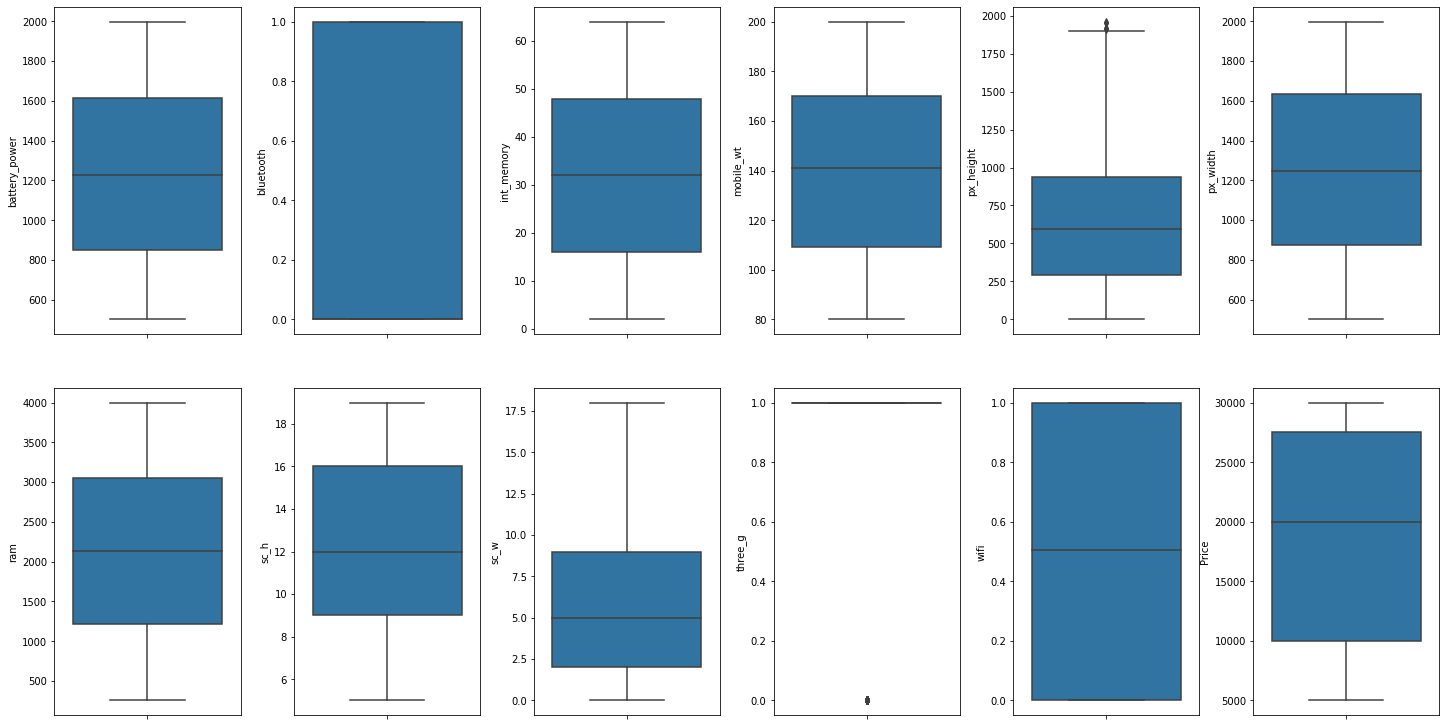

In [310]:
print("Finding outliers by using boxplot")
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten() # to flaten to 1d
for k,v in mydataset.items():
    sns.boxplot(y=v, data=mydataset, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.1, h_pad=5.0)
plt.show()

<AxesSubplot:ylabel='px_height'>

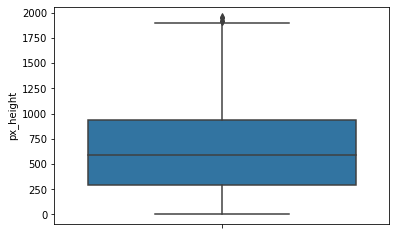

In [311]:
sns.boxplot(y=mydataset['px_height'],orient="vertical")

In [312]:
print("To handle outliers")
ds = mydataset[~(mydataset['px_height'] >= 1850.0)]
print(np.shape(ds))

To handle outliers
(1986, 12)


<AxesSubplot:ylabel='px_height'>

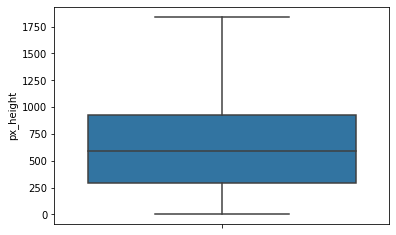

In [313]:
sns.boxplot(y=ds['px_height'],orient="vertical")

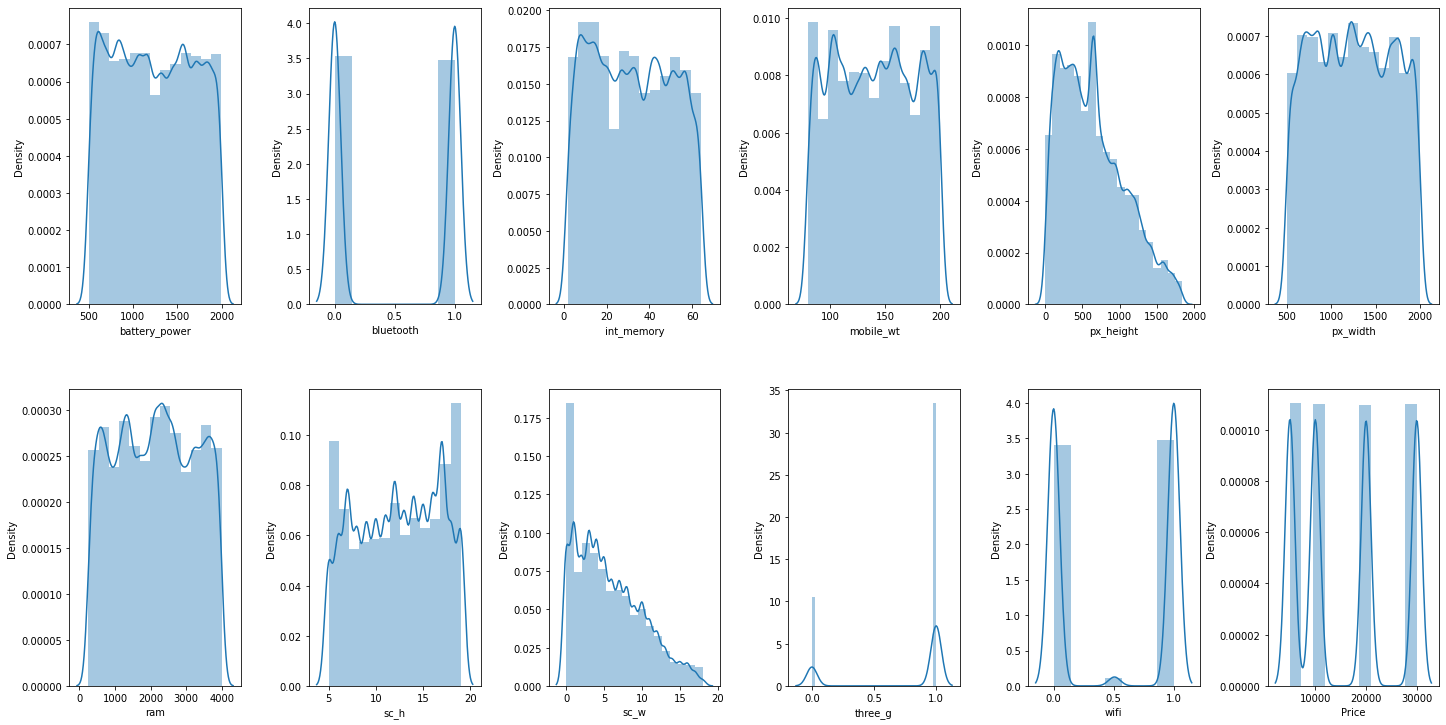

In [314]:
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in ds.items():    
    sns.distplot(v, ax=axs[index],kde_kws={'bw': 0.1}) 
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

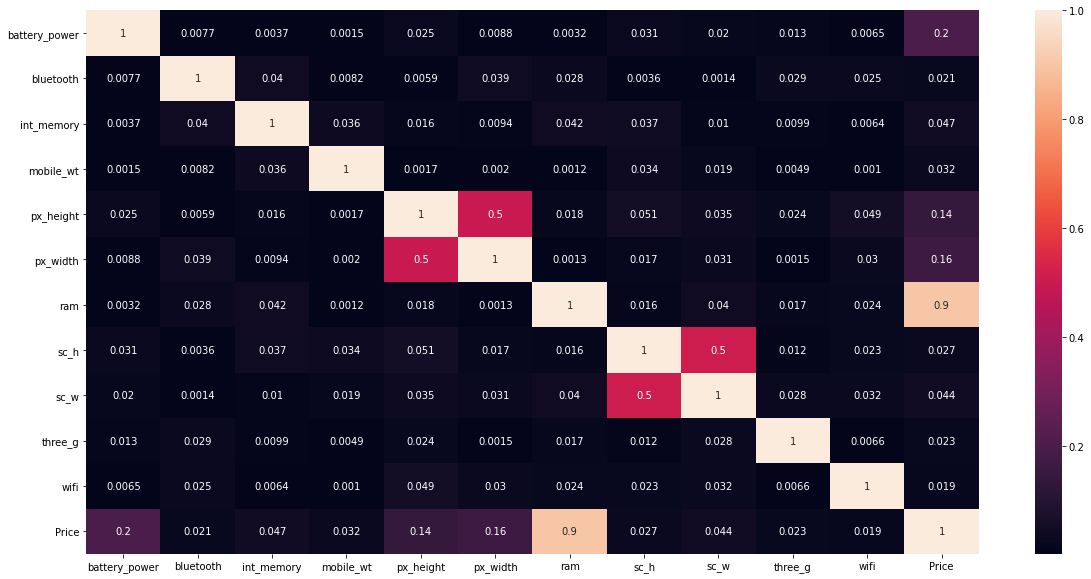

In [315]:
plt.figure(figsize=(20, 10))
sns.heatmap(ds.corr().abs(),  annot=True)
plt.show()

In [316]:
print("Pixel height and Pixel weight are dependent on each other. Same is the case with screen height and scren weight. So dropping these columns")
ds.drop(['px_height','sc_h'],axis=1,inplace=True)
ds

Pixel height and Pixel weight are dependent on each other. Same is the case with screen height and scren weight. So dropping these columns


,battery_power,bluetooth,int_memory,mobile_wt,px_width,ram,sc_w,three_g,wifi,Price
0,842,0,7,188.0,756,2549.0,7,0,1.0,10000
1,1021,1,53,136.0,1988,2631.0,3,1,0.0,20000
2,563,1,41,145.0,1716,2603.0,2,1,0.0,20000
3,615,1,10,131.0,1786,2769.0,8,1,0.0,20000
4,1821,1,44,141.0,1212,1411.0,2,1,0.0,10000
...,...,...,...,...,...,...,...,...,...,...
1995,794,1,2,106.0,1890,668.0,4,1,0.0,5000
1996,1965,1,39,187.0,1965,2032.0,10,1,1.0,20000
1997,1911,0,36,108.0,1632,3057.0,1,1,0.0,30000
1998,1512,0,46,145.0,670,869.0,10,1,1.0,5000


Heatmap


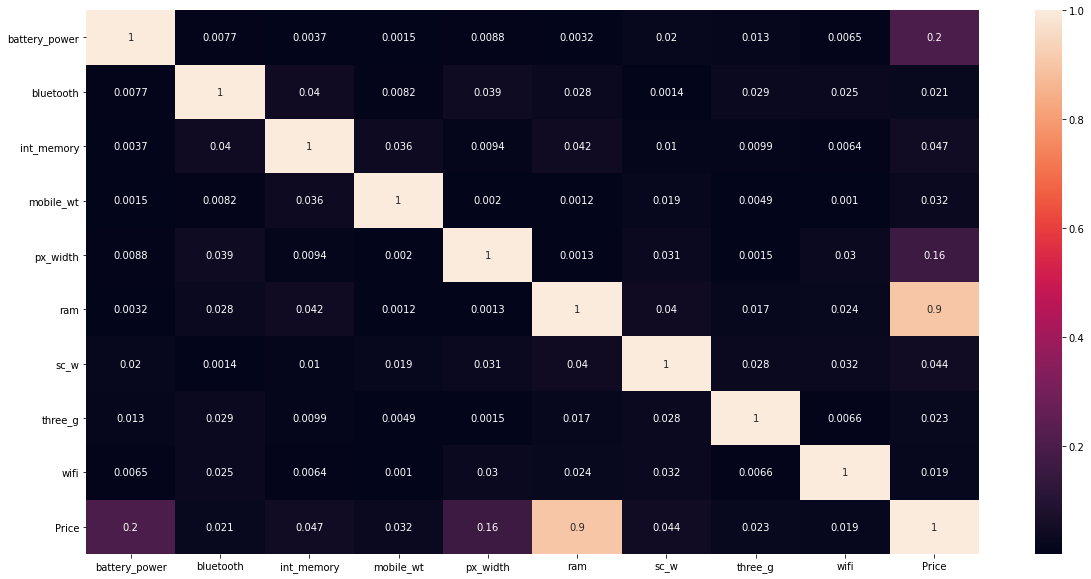

In [317]:
print("Heatmap")
plt.figure(figsize=(20, 10))
sns.heatmap(ds.corr().abs(),  annot=True)
plt.show()

In [318]:
ds.describe()

,battery_power,bluetooth,int_memory,mobile_wt,px_width,ram,sc_w,three_g,wifi,Price
count,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000
mean,1238.393756,0.495972,32.034743,140.240685,1247.158107,2126.889846,5.753273,0.760826,0.504879,16233.635448
std,439.802132,0.500110,18.154925,35.358324,430.230375,1074.358230,4.347911,0.426687,0.496184,9606.294986
min,501.000000,0.000000,2.000000,80.000000,500.000000,256.000000,0.000000,0.000000,0.000000,5000.000000
25%,852.000000,0.000000,16.000000,109.000000,874.000000,1218.500000,2.000000,1.000000,0.000000,5000.000000
50%,1226.000000,0.000000,32.000000,141.000000,1244.000000,2127.830389,5.000000,1.000000,0.506104,10000.000000
75%,1615.750000,1.000000,48.000000,170.000000,1625.250000,3052.500000,9.000000,1.000000,1.000000,20000.000000
max,1998.000000,1.000000,64.000000,200.000000,1998.000000,3998.000000,18.000000,1.000000,1.000000,30000.000000


In [319]:
print("Finding Scaled values")
from sklearn.preprocessing import StandardScaler
# Let's scale the columns before plotting them against MEDV
sc = StandardScaler()
column_sels = ['battery_power','bluetooth','int_memory','mobile_wt', 'px_width', 'ram','sc_w','three_g','wifi']
x = ds.loc[:,column_sels]
y = ds['Price']
#y_std=sc.StandardScaler(y)
data=sc.fit_transform(x)
x = pd.DataFrame(data, columns=column_sels)
x

Finding Scaled values


,battery_power,bluetooth,int_memory,mobile_wt,px_width,ram,sc_w,three_g,wifi
0,-0.901527,-0.991976,-1.379298,1.351064,-1.141904,0.392994,0.286814,-1.783551,0.99811
1,-0.494423,1.008089,1.155088,-0.119965,1.722399,0.469338,-0.633400,0.560679,-1.01778
2,-1.536063,1.008089,0.493944,0.134636,1.090021,0.443269,-0.863453,0.560679,-1.01778
3,-1.417798,1.008089,-1.214012,-0.261410,1.252765,0.597819,0.516867,0.560679,-1.01778
4,1.325034,1.008089,0.659230,0.021480,-0.081740,-0.666510,-0.863453,0.560679,-1.01778
...,...,...,...,...,...,...,...,...,...
1981,-1.010695,1.008089,-1.654775,-0.968635,1.494557,-1.358260,-0.403346,0.560679,-1.01778
1982,1.652537,1.008089,0.383753,1.322775,1.668926,-0.088345,0.976974,0.560679,0.99811
1983,1.529723,-0.991976,0.218467,-0.912057,0.894727,0.865954,-1.093507,0.560679,-1.01778
1984,0.622269,-0.991976,0.769421,0.134636,-1.341847,-1.171124,0.976974,0.560679,0.99811


3G supported specs


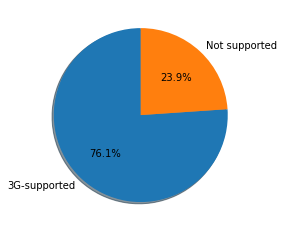

In [320]:
print("3G supported specs")
labels = ["3G-supported",'Not supported']
values=ds['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

Battery power vs Price Range


<AxesSubplot:xlabel='Price', ylabel='battery_power'>

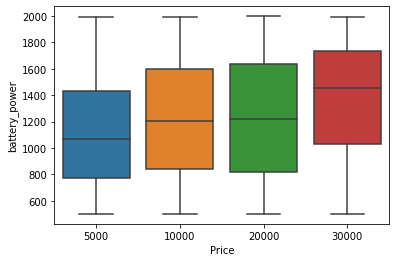

In [321]:
print("Battery power vs Price Range")
sns.boxplot(x="Price", y="battery_power", data=ds)

No of Phones vs Phone pixel and screen width


Text(0.5, 0, 'Width')

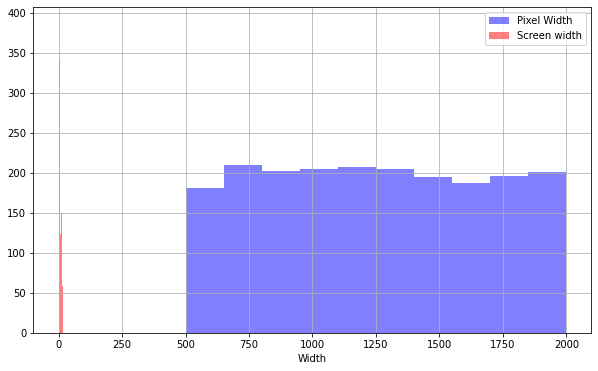

In [322]:
print("No of Phones vs Phone pixel and screen width")
plt.figure(figsize=(10,6))
ds['px_width'].hist(alpha=0.5,color='blue',label='Pixel Width')
ds['sc_w'].hist(alpha=0.5,color='red',label='Screen width')
plt.legend()
plt.xlabel('Width')

In [323]:
ds.head()

,battery_power,bluetooth,int_memory,mobile_wt,px_width,ram,sc_w,three_g,wifi,Price
0,842,0,7,188.0,756,2549.0,7,0,1.0,10000
1,1021,1,53,136.0,1988,2631.0,3,1,0.0,20000
2,563,1,41,145.0,1716,2603.0,2,1,0.0,20000
3,615,1,10,131.0,1786,2769.0,8,1,0.0,20000
4,1821,1,44,141.0,1212,1411.0,2,1,0.0,10000


Internal memory vs Price 


<AxesSubplot:xlabel='Price', ylabel='int_memory'>

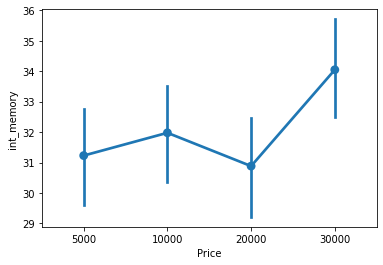

In [324]:
print("Internal memory vs Price ")
sns.pointplot(y="int_memory", x="Price", data=ds)

In [325]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=0)
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [326]:
lr.coef_

array([1970.89266916,   48.46104627,  133.15476356, -276.32246682,
       1573.3604302 , 8612.92185718,   56.49814847,   56.27072395,
        -85.90656495])

In [327]:
lr.intercept_

16234.194334806421

In [328]:
from sklearn.metrics import r2_score

In [329]:
r2_score(y_test,y_pred) #unknown, or prediction accuray

0.8780490444745961

In [330]:
lr.score(X_train,y_train) # known

0.8791713332862753

In [331]:
X_test

,battery_power,bluetooth,int_memory,mobile_wt,px_width,ram,sc_w,three_g,wifi
1620,0.281120,1.008089,0.824516,1.294486,-0.476976,1.398499,2.587348,-1.783551,0.99811
1433,-0.003170,1.008089,-1.048726,-1.194947,-0.565324,0.373443,0.516867,-1.783551,-1.01778
491,0.224262,-0.991976,-0.057010,1.294486,-1.402295,0.049447,-0.403346,0.560679,0.99811
610,0.297041,1.008089,0.108276,0.615549,-1.209327,1.609841,-0.403346,-1.783551,0.99811
1887,-0.621786,1.008089,-1.048726,1.605665,0.064730,0.201203,1.437081,0.560679,-1.01778
...,...,...,...,...,...,...,...,...,...
379,1.459219,1.008089,-0.773249,-0.063387,-1.274425,1.122916,2.127241,0.560679,-1.01778
712,-0.296557,-0.991976,0.934707,-0.006809,0.973775,1.049365,-1.323560,0.560679,-1.01778
1502,0.237908,-0.991976,-0.993630,-1.675860,-0.098014,-1.550050,0.286814,0.560679,0.99811
881,-0.407999,-0.991976,0.989802,1.181330,0.692459,-1.403880,-0.633400,-1.783551,0.99811


In [332]:
y_test

1632    30000
1444    20000
497     10000
616     30000
1901    20000
        ...  
385     30000
718     30000
1513     5000
887      5000
692     30000
Name: Price, Length: 199, dtype: int64

In [333]:
y_pred

array([27843.97606169, 18810.59681134, 14405.41522739, 28466.64152585,
       16509.22052383,  5446.63516115,  9503.48960113, 10569.77301889,
        6792.24876289, 12755.06348099, 32182.45252727, 15927.11909446,
       12482.07924535, 25694.96934771, 26910.68088387, 12933.77826246,
       15730.56363373, 11055.06887491, 15601.59683026, 29050.60062962,
       26489.8234681 , 21054.94294245, 16151.20216797, 10314.54067998,
       27113.80320366,  6324.55464373, 14371.77901574,  8217.83176445,
       14684.48496948, 12540.57420183, 31534.86103512, 28016.67967045,
       15742.22771164,  7813.37399674, 24928.5260312 , 11093.5532272 ,
       13259.3661392 , 10750.68975928, 12398.07206657, 12829.26859804,
       23690.00703589, 17432.21581802,  5014.05298883, 24888.84327463,
       16256.00563301, 31386.37008184,  4191.08230721, 13779.50242368,
       25385.87974767, 18738.53541897,  8977.81650369, 16696.89005656,
        8700.24120901, 21132.86077905, 27933.25199916, 18599.5393229 ,
      

In [334]:
print("Predicting a new price by giving random values of specs")
y_new=lr.predict([[842,0,7,188,756,2549,7,0,1]])
y_new

Predicting a new price by giving random values of specs


array([24768817.16100916])

In [335]:
print("Finding accuracy by KNN Classifier")
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

Finding accuracy by KNN Classifier


0.6733668341708543